<a href="https://colab.research.google.com/github/puschb/CS6336/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import sklearn
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dataset1 = np.loadtxt('project3_dataset1.txt')
dataset2 = np.genfromtxt('project3_dataset2.txt')

dataset1 = pd.DataFrame(dataset1)
dataset2 = pd.DataFrame(dataset2)

In [18]:
# Some data visualization

print( dataset1.describe() )
print( dataset2.describe() )

               0           1           2            3           4   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               5           6           7           8           9   ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   

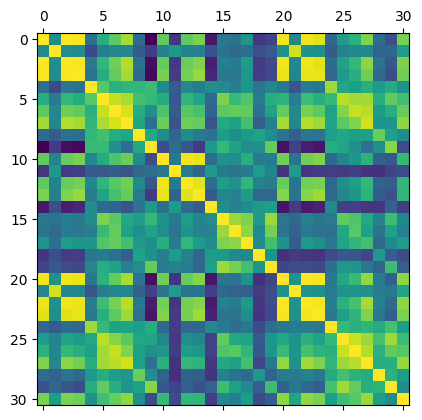

In [19]:
# Check correlations
# (Most interested in the bottom row, correlations between features and label)
plt.matshow( dataset1.corr() )
plt.show()

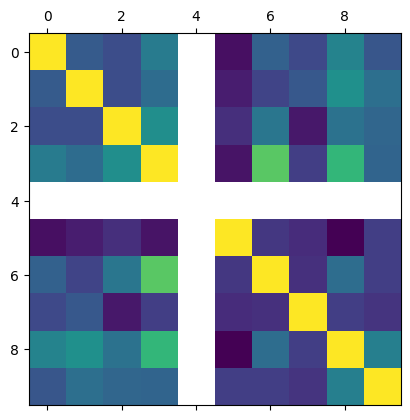

In [20]:
plt.matshow( dataset2.corr() )
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ])

ct = ColumnTransformer([("encoder", OneHotEncoder(),[4])], remainder="passthrough")

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', ct )
    ])

y1 = dataset1[:-1]
dataset1.drop(columns=dataset1.columns[-1],  axis=1,  inplace=True)

y1 = dataset2[:-1]
dataset2.drop(columns=dataset2.columns[-1],  axis=1,  inplace=True)

X_1, test_set1 = train_test_split(dataset1, test_size=.2)
X_2, test_set2 = train_test_split(dataset2, test_size=.2)

X_1 = pipeline1.fit_transform(X_1)
X_2 = pipeline2.fit_transform(X_2)

test_set1 = pipeline1.transform(test_set1)
test_set2 = pipeline2.transform(test_set2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
